## For Simple LSTM

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,InputLayer, BatchNormalization, GlobalAveragePooling2D 
from keras import models, layers
from tensorflow.keras.layers import LSTM, Dense , Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy


In [3]:
SEQUENCE_LENGTH = 29
FEATURES = 51

In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

def read_data_from_folder(folder_path, sequence_length=29):
    class_labels = os.listdir(folder_path)
    sequences = []
    labels = []
    for label_num_temp, person_folder in enumerate(class_labels):
        print(f"Running for person {person_folder}")
        person_folder_path = os.path.join(folder_path, person_folder)
        if not os.path.isdir(person_folder_path):
            continue
        
        for csv_file in os.listdir(person_folder_path):
            if not csv_file.endswith('.csv'):
                continue
            
            csv_file_path = os.path.join(person_folder_path, csv_file)
            df = pd.read_csv(csv_file_path)
            df = df.iloc[:, 2:]  # Select columns from the third column to the last
            num_frames = min(sequence_length, len(df))  # Ensure not more than sequence_length frames are taken
            
            sequence = df.iloc[:num_frames].values

            sequences.append(sequence)
            labels.append(label_num_temp) 

    return sequences, labels, class_labels


train_folder_path = 'D:/FYP/Data/video_frames/Data/CSV'
SEQUENCE_LENGTH = 29  # Define your desired sequence length

# Read data from the train folder
sequences, labels, class_labels = read_data_from_folder(train_folder_path, sequence_length=SEQUENCE_LENGTH)


Running for person ali
Running for person huzaifa
Running for person junaid
Running for person Salman


In [5]:
print(class_labels)
print(labels)
print(np.array(sequences).shape)
# Assuming you have the labels stored in the 'labels' variable
# Compute the number of unique labels (num_classes)
num_classes = len(set(labels))
print(f"The total number of classes is: {num_classes}")

['ali', 'huzaifa', 'junaid', 'Salman']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [6]:
import numpy as np

def count_occurrences(arr):
    unique_elements, counts = np.unique(arr, return_counts=True)
    occurrences_dict = dict(zip(unique_elements, counts))
    return occurrences_dict

# Example usage:
labels_array = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2])
occurrences = count_occurrences(labels_array)
print(occurrences)


{0: 6, 1: 6, 2: 9}


In [7]:
# Calculates the number of labels
print(count_occurrences(labels))

{0: 147, 1: 145, 2: 138, 3: 203}


In [8]:
# print(sequences.shape)
# print(labels.shape)
# labels_pd = pd.DataFrame(labels)
# print(len(labels_pd))

In [9]:
sequences = np.array(sequences)
labels = np.array(labels)

In [10]:
X_Lstm, X_val_lstm, y_lstm, y_val_lstm = train_test_split(sequences, labels, test_size=0.25, random_state=42)
print(X_Lstm.shape)
print(y_lstm.shape)
print(X_val_lstm.shape)
print(y_val_lstm.shape)

(474, 29, 51)
(474,)
(159, 29, 51)
(159,)


## For conv3D

In [11]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

# Function to load and preprocess the video frames
def load_video_frames(video_path, num_frames=29, image_shape=(64, 64)):
    frames = []
    cap = cv2.VideoCapture(video_path)

    # Get total frames and calculate skip_frames to sample equally from the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # skip_frames = max(total_frames // num_frames, 1)

    # Loop through the frames with the adjusted skip_frames
    for i in range(0, total_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, image_shape)
            frames.append(frame)

    cap.release()

    # Pad frames if the video has fewer frames than required
    if len(frames) < num_frames:
        print("Length of frames is ",len(frames))
        print("Number of frames is ",num_frames)
        frames.extend([frames[-1]] * (num_frames - len(frames)))
        # indices = np.linspace(0, len(frames) - 1, num_frames, dtype=np.int)
        # frames = [frames[i] for i in indices]    
    elif len(frames) > num_frames:
        # If the number of frames is greater, perform downsampling
        downsample_factor = len(frames) // num_frames
        indices = np.arange(0, len(frames), downsample_factor)[:num_frames]
        frames = [frames[i] for i in indices]
    print("Length of frames is ",len(frames))
    return np.array(frames)

# Function to load all videos and their labels from the root folder
def load_data(root_folder):
    class_labels = os.listdir(root_folder)
    videos = []
    labels = []

    for i, class_label in enumerate(class_labels):
        class_folder = os.path.join(root_folder, class_label)
        video_files = os.listdir(class_folder)

        for video_file in video_files:
            video_path = os.path.join(class_folder, video_file)
            frames = load_video_frames(video_path)
            videos.append(frames)
            print( np.array(videos).shape )

            labels.append(i)

    return np.array(videos), np.array(labels) , np.array(class_labels)


In [12]:
root_folder = 'D:/FYP/Data/video_frames/Data/1sec_videos'
with tf.device("CPU"):
    videos, labels , class_label = load_data(root_folder)
    # Split data into training and testing sets
    X_conv3d, X_val_conv3d, y_conv3d, y_val_conv3d = train_test_split(videos, labels, test_size=0.25, random_state=42)

Length of frames is  29
(1, 29, 64, 64, 3)
Length of frames is  29
(2, 29, 64, 64, 3)
Length of frames is  29
(3, 29, 64, 64, 3)
Length of frames is  29
(4, 29, 64, 64, 3)
Length of frames is  29
(5, 29, 64, 64, 3)
Length of frames is  29
(6, 29, 64, 64, 3)
Length of frames is  29
(7, 29, 64, 64, 3)
Length of frames is  29
(8, 29, 64, 64, 3)
Length of frames is  29
(9, 29, 64, 64, 3)
Length of frames is  29
(10, 29, 64, 64, 3)
Length of frames is  29
(11, 29, 64, 64, 3)
Length of frames is  29
(12, 29, 64, 64, 3)
Length of frames is  29
(13, 29, 64, 64, 3)
Length of frames is  29
(14, 29, 64, 64, 3)
Length of frames is  29
(15, 29, 64, 64, 3)
Length of frames is  29
(16, 29, 64, 64, 3)
Length of frames is  29
(17, 29, 64, 64, 3)
Length of frames is  29
(18, 29, 64, 64, 3)
Length of frames is  29
(19, 29, 64, 64, 3)
Length of frames is  29
(20, 29, 64, 64, 3)
Length of frames is  29
(21, 29, 64, 64, 3)
Length of frames is  29
(22, 29, 64, 64, 3)
Length of frames is  29
(23, 29, 64, 64, 

In [13]:
# y_conv3d = y_conv3d.reshape(-1, 1)
# y_val_conv3d = y_val_conv3d.reshape(-1, 1)
print("Class Labels: ", class_label)
print(type(X_conv3d))
print(type(y_conv3d))
print(type(X_val_conv3d))
print(type(y_val_conv3d))
print("The shape of X_conv3d is: ", X_conv3d.shape)
print("The shape of y_conv3d is: ", y_conv3d.shape)
print("The total number of labels is: ", len(np.unique(labels)))

Class Labels:  ['ali' 'huzaifa' 'junaid' 'salman']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
The shape of X_conv3d is:  (474, 29, 64, 64, 3)
The shape of y_conv3d is:  (474,)
The total number of labels is:  4


In [14]:
input_shape = X_conv3d.shape[1:]
print(input_shape)

(29, 64, 64, 3)


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Conv3D, Flatten
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Fusion 

In [16]:
# ---------------------- Fusion Without Layers ---------------------#
# def simple_model(input_shape, num_classes):
#     # Create the Conv3D model
#     model = tf.keras.Sequential([
#         Conv3D(2, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape),
#         Flatten(),  # Flatten the 3D convolution output
#         Dense(num_classes, activation='softmax')
#     ])
#     return model

# def simple_lstm(sequence_length, features, num_classes):
#     model = tf.keras.Sequential()
#     model.add(LSTM(64, input_shape=(sequence_length, features)))  
#     model.add(Dense(num_classes, activation='softmax'))  # num_classes = number of unique labels
#     return model

# def late_fusion_model(conv3d_input_shape, lstm_input_shape, num_classes):
#     conv3d_input = Input(shape=conv3d_input_shape)
#     lstm_input = Input(shape=lstm_input_shape)

#     conv3d_model = simple_model(conv3d_input_shape, num_classes)
#     lstm_model = simple_lstm(lstm_input_shape[0], lstm_input_shape[1], num_classes)
#     # Load pre-trained weights for the Conv3D model
#     print("Loading Conv3D model.......")
#     conv3d_model.load_weights("../simple_model_weights.h5")

#     print("Loading LSTM model.........")
#     # Load pre-trained weights for the LSTM model
#     lstm_model.load_weights("./lstm_model.h5")

#     conv3d_output = conv3d_model(conv3d_input)
#     lstm_output = lstm_model(lstm_input)

#     print("Fusing the models......")
#     # Perform late fusion by concatenating the probabilities from both models
#     fused_output = tf.keras.layers.Concatenate()([conv3d_output, lstm_output])

#     fused_model = tf.keras.Model(inputs=[conv3d_input, lstm_input], outputs=fused_output)
#     fused_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     fused_model.summary()
#     return fused_model




# ---------------------- Fusion With Layers ---------------------#
import tensorflow as tf
from tensorflow.keras.layers import Conv3D, Flatten, Dense, LSTM, Input, Concatenate

def simple_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        Conv3D(2, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])
    return model

def simple_lstm(sequence_length, features, num_classes):
    model = tf.keras.Sequential()
    model.add(LSTM(64, input_shape=(sequence_length, features)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def late_fusion_model(conv3d_input_shape, lstm_input_shape, num_classes):
    conv3d_input = Input(shape=conv3d_input_shape)
    lstm_input = Input(shape=lstm_input_shape)

    conv3d_model = simple_model(conv3d_input_shape, num_classes)
    lstm_model = simple_lstm(lstm_input_shape[0], lstm_input_shape[1], num_classes)

    # Load pre-trained weights for the Conv3D model
    # conv3d_model.load_weights("../simple_model_weights.h5")

    # Load pre-trained weights for the LSTM model
    # lstm_model.load_weights("./lstm_model.h5")

    conv3d_output = conv3d_model(conv3d_input)
    lstm_output = lstm_model(lstm_input)

    # Perform late fusion by concatenating the probabilities from both models
    fused_output = Concatenate()([conv3d_output, lstm_output])
    fused_output = Dense(num_classes, activation='softmax')(fused_output)  # Additional layer for fusion

    fused_model = tf.keras.Model(inputs=[conv3d_input, lstm_input], outputs=fused_output)
    fused_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    fused_model.summary()
    return fused_model


In [17]:

# Example usage
conv3d_input_shape = (29, 64, 64, 3)
lstm_input_shape = (29, 51)
num_classes = 4
print("The shape of X_conv3D: ",X_conv3d.shape)
print("The shape of y_conv3D: ",y_conv3d.shape)
print("The shape of X_Lstm: ",X_Lstm.shape)
print("The shape of y_Lstm: ",y_lstm.shape)

The shape of X_conv3D:  (474, 29, 64, 64, 3)
The shape of y_conv3D:  (474,)
The shape of X_Lstm:  (474, 29, 51)
The shape of y_Lstm:  (474,)


In [18]:
print(y_conv3d[0:30])
print(y_lstm[0:30])

[3 2 1 2 2 0 3 1 1 0 3 3 2 3 1 0 1 2 3 1 1 3 3 1 1 1 0 0 3 0]
[3 2 1 2 2 0 3 1 1 0 3 3 2 3 1 0 1 2 3 1 1 3 3 1 1 1 0 0 3 0]


In [19]:
# # Assuming you have training data X_conv3d and X_Lstm, and labels y
# num_samples_conv3d = X_conv3d.shape[0]
# print(num_samples_conv3d)
# subsample_indices = np.random.choice(X_Lstm.shape[0], num_samples_conv3d, replace=False)
# print(subsample_indices)
# X_Lstm_subsampled = X_Lstm[subsample_indices]
# y_lstm_subsampled = y_lstm[subsample_indices]
# print("The shape of X_Lstm_subsampled: ",X_Lstm_subsampled.shape)
# print("The shape of Y_Lstm_subsampled: ",y_lstm_subsampled.shape)
# print("The shape of X_conv3D: ",X_conv3d.shape)


In [20]:
# print(y_conv3d)
# print(y_lstm_subsampled)

In [21]:
print(conv3d_input_shape)
print(lstm_input_shape)
fused_model = late_fusion_model(conv3d_input_shape, lstm_input_shape, num_classes)


(29, 64, 64, 3)
(29, 51)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 29, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 input_2 (InputLayer)           [(None, 29, 51)]     0           []                               
                                                                                                  
 sequential (Sequential)        (None, 4)            830472      ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 4)            29956       ['in

In [22]:
import numpy as np

# Convert X_val_lstm to float32
X_val_lstm = X_val_lstm.astype(np.float32)

# Convert y_val_conv3d to int32
y_val_conv3d = y_val_conv3d.astype(np.int32)

print("X_val_conv3d shape:", X_val_conv3d.shape)
print("X_val_lstm shape:", X_val_lstm.shape)
print("y_val_conv3d shape:", y_val_conv3d.shape)
print("X_val_conv3d dtype:", X_val_conv3d.dtype)
print("X_val_lstm dtype:", X_val_lstm.dtype)
print("y_val_conv3d dtype:", y_val_conv3d.dtype)

X_val_conv3d shape: (159, 29, 64, 64, 3)
X_val_lstm shape: (159, 29, 51)
y_val_conv3d shape: (159,)
X_val_conv3d dtype: uint8
X_val_lstm dtype: float32
y_val_conv3d dtype: int32


In [23]:
firtting = fused_model.fit([X_conv3d, X_Lstm], y_lstm,
                          validation_data=([X_val_conv3d, X_val_lstm], y_val_conv3d),
                          epochs=100, verbose=1)


Epoch 1/100
15/15 [==============================] - 22s 500ms/step - loss: 1.4888 - accuracy: 0.2996 - val_loss: 1.3883 - val_accuracy: 0.3836
Epoch 2/100
15/15 [==============================] - 2s 150ms/step - loss: 1.4533 - accuracy: 0.2996 - val_loss: 1.3758 - val_accuracy: 0.3836
Epoch 3/100
15/15 [==============================] - 2s 110ms/step - loss: 1.4315 - accuracy: 0.2996 - val_loss: 1.3663 - val_accuracy: 0.3836
Epoch 4/100
15/15 [==============================] - 1s 91ms/step - loss: 1.4151 - accuracy: 0.2996 - val_loss: 1.3555 - val_accuracy: 0.3836
Epoch 5/100
15/15 [==============================] - 1s 83ms/step - loss: 1.4003 - accuracy: 0.2996 - val_loss: 1.3459 - val_accuracy: 0.3836
Epoch 6/100
15/15 [==============================] - 1s 82ms/step - loss: 1.3860 - accuracy: 0.2996 - val_loss: 1.3320 - val_accuracy: 0.3836
Epoch 7/100
15/15 [==============================] - 1s 82ms/step - loss: 1.3678 - accuracy: 0.2996 - val_loss: 1.3155 - val_accuracy: 0.3836
Ep

In [24]:
fused_model.save_weights('fused_model_conv(29,64,64,3)_lstm(29,51).h5')

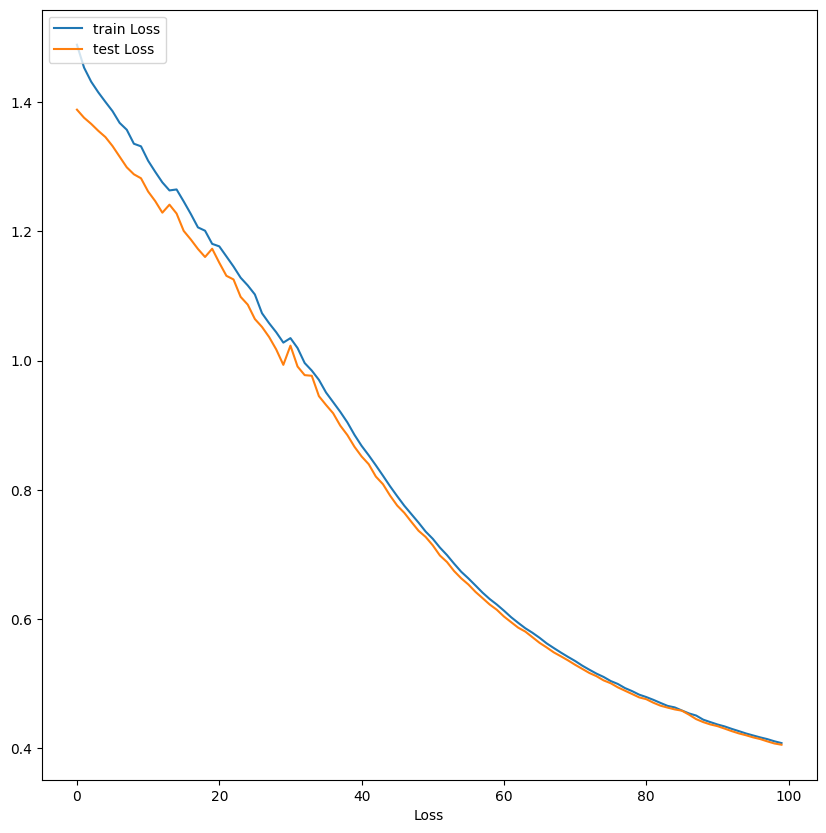

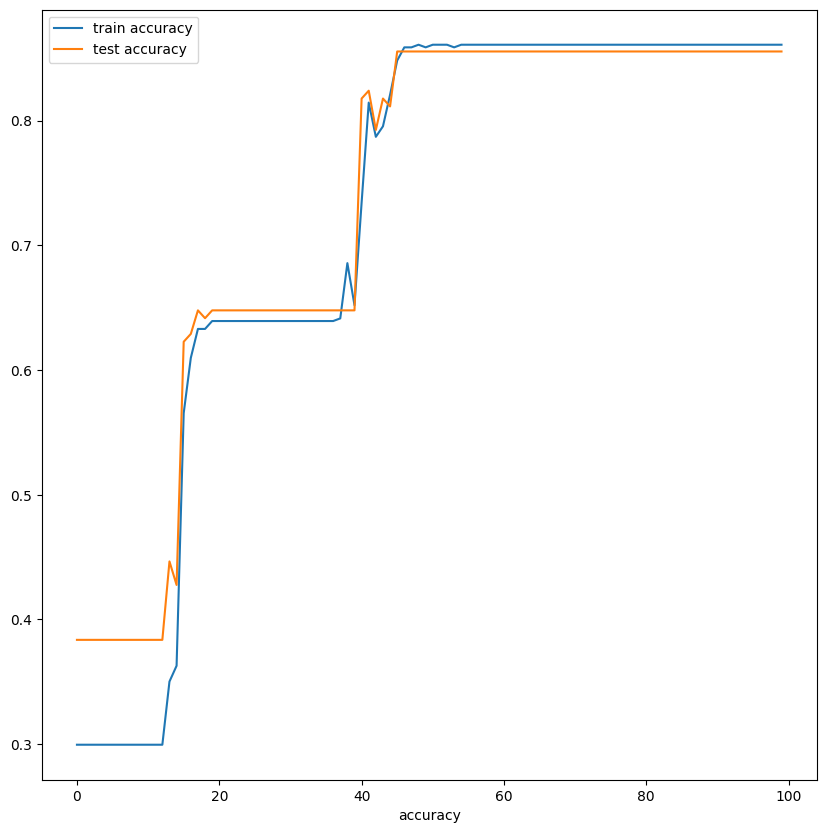

In [26]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(firtting.history['loss'])
plt.plot(firtting.history['val_loss'])
plt.legend(['train Loss','test Loss'],loc='upper left')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.show()
#-----------------------------#
plt.figure(figsize=(10,10))
plt.plot(firtting.history['accuracy'])
plt.plot(firtting.history['val_accuracy'])
plt.legend(['train accuracy','test accuracy'],loc='upper left')
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.show()


# Fusion Using Extra Layer


In [62]:
import cv2
import pandas as pd

def process_video_and_csv(video_path, csv_path):
    # Read the video
    cap = cv2.VideoCapture(video_path)

    # Create a list to store frames
    frames = []

    frame_count = 0
    while cap.isOpened() and frame_count < 29:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (64, 64))
        frames.append(frame)
        frame_count += 1

    cap.release()

    # Read the CSV file and skip the first two columns
    csv_data = pd.read_csv(csv_path)
    df = csv_data.iloc[:29, 2:]
    # Return the frames and CSV data
    return np.array(frames), np.array(df)

# Example usage
# video_path = 'D:/FYP/Data/video_frames/Data/1sec_videos/salman/video_002.mp4'
# csv_path = 'D:/FYP/Data/video_frames/Data/CSV/salman/video_007.csv'
# video_path = 'D:/FYP/Data/video_frames/junaid.mp4'
# csv_path = 'D:/FYP/Data/video_frames/lstm_network/test/juanid/junaid.csv'

conv3d_input, lstm_input = process_video_and_csv(video_path, csv_path)
print("Number of frames:",conv3d_input.shape)
print("CSV data:")
print(lstm_input.shape)


Number of frames: (29, 64, 64, 3)
CSV data:
(29, 51)


In [63]:

# Prediction code
def predict_with_fused_model(fused_model, conv3d_input, lstm_input):
    conv3d_input = np.expand_dims(conv3d_input, axis=0)
    lstm_input = np.expand_dims(lstm_input, axis=0)
    predictions = fused_model.predict([conv3d_input, lstm_input])
    return predictions



predictions = predict_with_fused_model(fused_model, conv3d_input, lstm_input)
print(predictions)
print(len(predictions[0]))


1/1 [==============================] - 0s 38ms/step
[[0.08007735 0.350006   0.5006316  0.06928503]]
4


In [64]:
predictions = predictions.squeeze().tolist()


In [65]:
for i in range(len(predictions)):
    print(f"The Probability of {class_label[i]} is {predictions[i]*100:.2f}%")



The Probability of ali is 8.01%
The Probability of huzaifa is 35.00%
The Probability of junaid is 50.06%
The Probability of salman is 6.93%
